# Import File and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import datetime as dt

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
# Read file in as Pandas dataframe

dfh = pd.read_csv('kc3_house_data.csv')
dfh.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,distance_from_city,SD_Auburn,...,SD_MercerIsland,SD_Northshore,SD_Renton,SD_Riverview,SD_Seattle,SD_Shoreline,SD_SnoqualmieValley,SD_Tahoma,SD_Tukwila,SD_VashonIsland
0,221900.0,3,1.00,1.0,0.0,0.0,3,7,7.622786,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,538000.0,3,2.25,2.0,0.0,0.0,3,7,7.766476,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,180000.0,2,1.00,1.0,0.0,0.0,3,6,8.561145,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,4,3.00,1.0,0.0,0.0,5,7,6.655340,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,3,2.00,1.0,0.0,0.0,3,8,7.402273,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
dfh.corr()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,distance_from_city,SD_Auburn,...,SD_MercerIsland,SD_Northshore,SD_Renton,SD_Riverview,SD_Seattle,SD_Shoreline,SD_SnoqualmieValley,SD_Tahoma,SD_Tukwila,SD_VashonIsland
price,1.000000,0.295275,0.440243,0.269486,0.051813,0.213120,0.033946,0.617743,-0.446591,-0.144352,...,0.151901,0.057980,-0.134845,-0.028171,0.177952,-0.054207,0.004411,-0.092646,-0.134811,0.002460
bedrooms,0.295275,1.000000,0.499567,0.157301,-0.027363,0.031535,0.023294,0.330037,0.055840,0.022652,...,0.043373,0.043239,0.003647,-0.015791,-0.190948,-0.029215,0.012861,0.024093,-0.042868,-0.047336
bathrooms,0.440243,0.499567,1.000000,0.504069,-0.006228,0.080674,-0.139028,0.608200,0.071443,0.012534,...,0.024306,0.057954,-0.037911,0.023002,-0.155317,-0.097621,0.064524,0.081578,-0.100783,-0.015604
floors,0.269486,0.157301,0.504069,1.000000,-0.006607,-0.018082,-0.278563,0.457574,-0.011586,0.010776,...,-0.029642,0.006267,-0.053019,0.036502,0.066382,-0.085585,0.065331,0.086554,-0.067547,-0.007576
waterfront,0.051813,-0.027363,-0.006228,-0.006607,1.000000,0.282320,0.011941,-0.013079,0.021937,-0.008361,...,-0.004283,-0.010903,0.022314,-0.006245,-0.025348,-0.014463,-0.008647,-0.008647,-0.005811,0.234570
view,0.213120,0.031535,0.080674,-0.018082,0.282320,1.000000,0.030999,0.114924,-0.007603,-0.019088,...,0.006841,-0.033534,0.025620,-0.016366,0.042993,0.000086,0.014969,-0.037597,-0.027609,0.110241
condition,0.033946,0.023294,-0.139028,-0.278563,0.011941,0.030999,1.000000,-0.174140,-0.041677,0.017659,...,0.057286,-0.037819,0.030179,-0.057926,0.028544,0.024255,-0.077631,-0.056578,-0.028867,0.033044
grade,0.617743,0.330037,0.608200,0.457574,-0.013079,0.114924,-0.174140,1.000000,-0.023782,-0.011860,...,0.059830,0.091954,-0.083391,-0.010609,-0.129685,-0.081969,0.021898,0.013719,-0.114563,-0.018956
distance_from_city,-0.446591,0.055840,0.071443,-0.011586,0.021937,-0.007603,-0.041677,-0.023782,1.000000,0.312246,...,-0.083463,0.006807,-0.047193,0.110207,-0.535000,-0.047225,0.247766,0.244521,-0.029400,0.056300
SD_Auburn,-0.144352,0.022652,0.012534,0.010776,-0.008361,-0.019088,0.017659,-0.011860,0.312246,1.000000,...,-0.014372,-0.036587,-0.036858,-0.020956,-0.100261,-0.048534,-0.029015,-0.029015,-0.019501,-0.012701


In [5]:
abs(dfh.corr()) > 0.75

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,distance_from_city,SD_Auburn,...,SD_MercerIsland,SD_Northshore,SD_Renton,SD_Riverview,SD_Seattle,SD_Shoreline,SD_SnoqualmieValley,SD_Tahoma,SD_Tukwila,SD_VashonIsland
price,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
distance_from_city,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
SD_Auburn,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


# Linear Regression Using Statsmodels

## Simple Regression of Individual Features

In [6]:
# Run regressions of remaining feature variables to assess individual impact on model

formula = 'price ~ grade'
model = ols(formula = formula, data = dfh).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                 1.241e+04
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:02:20   Log-Likelihood:            -2.6888e+05
No. Observations:               20116   AIC:                         5.378e+05
Df Residuals:                   20114   BIC:                         5.378e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.321e+05   8150.137    -53.015      0.000   -4.48e+05   -4.16e+05
grade       1.199e+05   1076.196    111.410      0.000    1.18e+05    1.22e+05
==============================================================================
Omnibus:                      945.875   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1082.981
Skew:                           0.562   Prob(JB):                    6.82e-236
Kurtosis:                       3.175   Cond. No.                         57.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
formula = 'price ~ distance_from_city'
model = ols(formula = formula, data = dfh).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     5011.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:02:22   Log-Likelihood:            -2.7148e+05
No. Observations:               20116   AIC:                         5.430e+05
Df Residuals:                   20114   BIC:                         5.430e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           6.082e+05   2338.582    260.061      0.000    6.04e+05    6.13e+05
distance_from_city -1.407e+04    198.762    -70.789      0.000   -1.45e+04   -1.37e+04
==============================================================================
Omnibus:                      999.352   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1156.241
Skew:                           0.587   Prob(JB):                    8.42e-252
Kurtosis:                       3.010   Cond. No.                         22.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
formula = 'price ~ bedrooms'
model = ols(formula = formula, data = dfh).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     1921.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:02:23   Log-Likelihood:            -2.7280e+05
No. Observations:               20116   AIC:                         5.456e+05
Df Residuals:                   20114   BIC:                         5.456e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.463e+05   5222.888     47.163      0.000    2.36e+05    2.57e+05
bedrooms    6.678e+04   1523.638     43.831      0.000    6.38e+04    6.98e+04
==============================================================================
Omnibus:                     1045.592   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1157.031
Skew:                           0.569   Prob(JB):                    5.67e-252
Kurtosis:                       2.704   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
formula = 'price ~ bathrooms'
model = ols(formula = formula, data = dfh).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     4836.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:02:23   Log-Likelihood:            -2.7155e+05
No. Observations:               20116   AIC:                         5.431e+05
Df Residuals:                   20114   BIC:                         5.431e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.153e+05   3837.971     56.096      0.000    2.08e+05    2.23e+05
bathrooms   1.239e+05   1782.443     69.538      0.000     1.2e+05    1.27e+05
==============================================================================
Omnibus:                     1019.534   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1172.110
Skew:                           0.586   Prob(JB):                    3.02e-255
Kurtosis:                       2.845   Cond. No.                         7.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
formula = 'price ~ floors'
model = ols(formula = formula, data = dfh).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     1575.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:02:24   Log-Likelihood:            -2.7296e+05
No. Observations:               20116   AIC:                         5.459e+05
Df Residuals:                   20114   BIC:                         5.459e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.226e+05   3894.285     82.833      0.000    3.15e+05     3.3e+05
floors      9.872e+04   2487.317     39.688      0.000    9.38e+04    1.04e+05
==============================================================================
Omnibus:                     1198.932   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1368.199
Skew:                           0.623   Prob(JB):                    7.93e-298
Kurtosis:                       2.716   Cond. No.                         6.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
formula = 'price ~ waterfront'
model = ols(formula = formula, data = dfh).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     54.14
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           1.93e-13
Time:                        22:02:25   Log-Likelihood:            -2.7369e+05
No. Observations:               20116   AIC:                         5.474e+05
Df Residuals:                   20114   BIC:                         5.474e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.673e+05   1384.856    337.417      0.000    4.65e+05     4.7e+05
waterfront  2.044e+05   2.78e+04      7.358      0.000     1.5e+05    2.59e+05
==============================================================================
Omnibus:                     1235.207   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1399.567
Skew:                           0.627   Prob(JB):                    1.22e-304
Kurtosis:                       2.687   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
formula = 'price ~ view'
model = ols(formula = formula, data = dfh).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     957.1
Date:                Thu, 18 Feb 2021   Prob (F-statistic):          2.47e-205
Time:                        22:02:27   Log-Likelihood:            -2.7325e+05
No. Observations:               20116   AIC:                         5.465e+05
Df Residuals:                   20114   BIC:                         5.465e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.568e+05   1398.570    326.654      0.000    4.54e+05     4.6e+05
view        6.768e+04   2187.592     30.936      0.000    6.34e+04     7.2e+04
==============================================================================
Omnibus:                     1176.095   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1358.946
Skew:                           0.625   Prob(JB):                    8.10e-296
Kurtosis:                       2.761   Cond. No.                         1.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
formula = 'price ~ condition'
model = ols(formula = formula, data = dfh).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     23.20
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           1.47e-06
Time:                        22:02:29   Log-Likelihood:            -2.7371e+05
No. Observations:               20116   AIC:                         5.474e+05
Df Residuals:                   20114   BIC:                         5.474e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.326e+05   7428.590     58.238      0.000    4.18e+05    4.47e+05
condition   1.032e+04   2143.149      4.817      0.000    6123.047    1.45e+04
==============================================================================
Omnibus:                     1231.672   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1395.816
Skew:                           0.626   Prob(JB):                    7.99e-304
Kurtosis:                       2.689   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple Regression of all features

In [14]:
# Run regression model on all significant features

outcome = 'price'
predictors = dfh.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [15]:
model = ols(formula=formula, data=dfh).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     1840.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:02:34   Log-Likelihood:            -2.6174e+05
No. Observations:               20116   AIC:                         5.235e+05
Df Residuals:                   20090   BIC:                         5.237e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.462e+05   9222.668    -37.540      0.000   -3.64e+05   -3.28e+05
bedrooms             2.227e+04   1042.279     21.364      0.000    2.02e+04    2.43e+04
bathrooms             3.38e+04   1625.719     20.789      0.000    3.06e+04     3.7e+04
floors              -9428.6490   1810.596     -5.207      0.000    -1.3e+04   -5879.732
waterfront           1.622e+05   1.64e+04      9.869      0.000     1.3e+05    1.94e+05
view                 3.875e+04   1326.837     29.204      0.000    3.61e+04    4.13e+04
condition            3.198e+04   1260.597     25.371      0.000    2.95e+04    3.45e+04
grade                9.093e+04   1028.849     88.384      0.000    8.89e+04     9.3e+04
distance_from_city  -9421.4057    370.789    -25.409      0.000   -1.01e+04   -8694.629
SD_Auburn           -7.523e+04   5805.087    -12.960      0.000   -8.66e+04   -6.39e+04
SD_Bellevue          5.049e+04   4643.979     10.871      0.000    4.14e+04    5.96e+04
SD_Enumclaw          3.344e+04   8120.383      4.118      0.000    1.75e+04    4.94e+04
SD_FederalWay       -1.014e+05   4135.276    -24.512      0.000   -1.09e+05   -9.33e+04
SD_Highline         -9.185e+04   4091.965    -22.446      0.000   -9.99e+04   -8.38e+04
SD_Issaquah          4033.1922   3193.880      1.263      0.207   -2227.074    1.03e+04
SD_Kent             -1.166e+05   3116.787    -37.413      0.000   -1.23e+05    -1.1e+05
SD_LakeWashington    3.162e+04   3128.079     10.109      0.000    2.55e+04    3.78e+04
SD_MercerIsland      1.741e+05   9128.141     19.070      0.000    1.56e+05    1.92e+05
SD_Northshore       -5921.7054   3705.682     -1.598      0.110   -1.32e+04    1341.736
SD_Renton           -1.209e+05   3760.296    -32.147      0.000   -1.28e+05   -1.14e+05
SD_Riverview         9130.6903   6092.767      1.499      0.134   -2811.632    2.11e+04
SD_Seattle           1.745e+04   3344.586      5.217      0.000    1.09e+04     2.4e+04
SD_Shoreline        -3.209e+04   3061.195    -10.483      0.000   -3.81e+04   -2.61e+04
SD_SnoqualmieValley  5.779e+04   5126.210     11.274      0.000    4.77e+04    6.78e+04
SD_Tahoma           -4.721e+04   5118.271     -9.225      0.000   -5.72e+04   -3.72e+04
SD_Tukwila          -1.348e+05   6515.759    -20.687      0.000   -1.48e+05   -1.22e+05
SD_VashonIsland      1712.0265   9990.553      0.171      0.864   -1.79e+04    2.13e+04
==============================================================================
Omnibus:                     1274.119   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2160.685
Skew:                           0.496   Prob(JB):                         0.00
Kurtosis:                       4.263   Cond. No.                     5.95e+15
================================================

In [16]:
# Drop columns with p-value greater than 0.05

dfh.drop(['SD_VashonIsland', 'SD_Issaquah', 'SD_Riverview', 'SD_Northshore'], axis = 1, inplace = True)

In [17]:
# Run model again after dropping feature with high p-value

outcome = 'price'
predictors = dfh.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=dfh).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     2090.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:02:43   Log-Likelihood:            -2.6174e+05
No. Observations:               20116   AIC:                         5.235e+05
Df Residuals:                   20093   BIC:                         5.237e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.459e+05   9745.607    -35.492      0.000   -3.65e+05   -3.27e+05
bedrooms             2.224e+04   1041.385     21.353      0.000    2.02e+04    2.43e+04
bathrooms            3.387e+04   1625.567     20.835      0.000    3.07e+04    3.71e+04
floors              -9112.6227   1806.311     -5.045      0.000   -1.27e+04   -5572.105
waterfront            1.62e+05   1.61e+04     10.070      0.000     1.3e+05    1.94e+05
view                 3.879e+04   1323.714     29.303      0.000    3.62e+04    4.14e+04
condition            3.199e+04   1258.393     25.423      0.000    2.95e+04    3.45e+04
grade                9.083e+04   1025.276     88.590      0.000    8.88e+04    9.28e+04
distance_from_city  -9313.0195    349.497    -26.647      0.000   -9998.062   -8627.977
SD_Auburn           -7.767e+04   6365.958    -12.201      0.000   -9.02e+04   -6.52e+04
SD_Bellevue          5.011e+04   4641.473     10.796      0.000     4.1e+04    5.92e+04
SD_Enumclaw          3.039e+04   8602.364      3.533      0.000    1.35e+04    4.73e+04
SD_FederalWay       -1.035e+05   4760.134    -21.751      0.000   -1.13e+05   -9.42e+04
SD_Highline         -9.294e+04   4647.245    -19.999      0.000   -1.02e+05   -8.38e+04
SD_Kent             -1.184e+05   3799.485    -31.153      0.000   -1.26e+05   -1.11e+05
SD_LakeWashington     3.08e+04   3329.310      9.250      0.000    2.43e+04    3.73e+04
SD_MercerIsland      1.737e+05   9502.217     18.279      0.000    1.55e+05    1.92e+05
SD_Renton           -1.219e+05   4233.149    -28.796      0.000    -1.3e+05   -1.14e+05
SD_Seattle           1.685e+04   3426.376      4.917      0.000    1.01e+04    2.36e+04
SD_Shoreline        -3.311e+04   3551.800     -9.322      0.000   -4.01e+04   -2.61e+04
SD_SnoqualmieValley   5.56e+04   5728.339      9.705      0.000    4.44e+04    6.68e+04
SD_Tahoma           -4.942e+04   5711.564     -8.653      0.000   -6.06e+04   -3.82e+04
SD_Tukwila          -1.357e+05   7087.056    -19.154      0.000    -1.5e+05   -1.22e+05
==============================================================================
Omnibus:                     1276.647   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2162.072
Skew:                           0.497   Prob(JB):                         0.00
Kurtosis:                       4.261   Cond. No.                         305.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Assess multicollinearity using VIF

In [18]:
# Import vif from statsmodels library

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [19]:
dfhi = dfh.drop(['price'], axis = 1)

for i in range(len(dfhi.columns[:-1])):
    v = vif(np.matrix(dfhi[:-1]), i)
    print('Variance inflation factor for {}: {}'.format(dfhi.columns[i], round(v, 2)))

Variance inflation factor for bedrooms: 21.18
Variance inflation factor for bathrooms: 20.23
Variance inflation factor for floors: 13.56
Variance inflation factor for waterfront: 1.1
Variance inflation factor for view: 1.21
Variance inflation factor for condition: 23.44
Variance inflation factor for grade: 59.56
Variance inflation factor for distance_from_city: 23.54
Variance inflation factor for SD_Auburn: 1.84
Variance inflation factor for SD_Bellevue: 1.82
Variance inflation factor for SD_Enumclaw: 2.0
Variance inflation factor for SD_FederalWay: 2.69
Variance inflation factor for SD_Highline: 1.24
Variance inflation factor for SD_Kent: 2.03
Variance inflation factor for SD_LakeWashington: 1.9
Variance inflation factor for SD_MercerIsland: 1.12
Variance inflation factor for SD_Renton: 1.32
Variance inflation factor for SD_Seattle: 3.99
Variance inflation factor for SD_Shoreline: 1.53
Variance inflation factor for SD_SnoqualmieValley: 1.63
Variance inflation factor for SD_Tahoma: 1.6

In [20]:
# Remove all features with VIF above 10

dfh.drop(['bedrooms', 'bathrooms', 'floors', 'condition', 'distance_from_city'], axis =1, inplace = True)

In [21]:
outcome = 'price'
predictors = dfh.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=dfh).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     2190.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:02:57   Log-Likelihood:            -2.6318e+05
No. Observations:               20116   AIC:                         5.264e+05
Df Residuals:                   20098   BIC:                         5.265e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.116e+05   7278.850    -42.810      0.000   -3.26e+05   -2.97e+05
waterfront           1.326e+05   1.73e+04      7.686      0.000    9.88e+04    1.66e+05
view                 4.231e+04   1412.186     29.962      0.000    3.95e+04    4.51e+04
grade                1.051e+05    872.200    120.467      0.000    1.03e+05    1.07e+05
SD_Auburn           -1.748e+05   5453.407    -32.052      0.000   -1.85e+05   -1.64e+05
SD_Bellevue            1.3e+05   4188.518     31.032      0.000    1.22e+05    1.38e+05
SD_Enumclaw         -1.205e+05   6805.195    -17.714      0.000   -1.34e+05   -1.07e+05
SD_FederalWay       -1.886e+05   3833.573    -49.209      0.000   -1.96e+05   -1.81e+05
SD_Highline          -8.88e+04   4959.667    -17.905      0.000   -9.85e+04   -7.91e+04
SD_Kent             -1.569e+05   3641.949    -43.068      0.000   -1.64e+05    -1.5e+05
SD_LakeWashington    6.195e+04   3316.851     18.678      0.000    5.54e+04    6.85e+04
SD_MercerIsland      2.555e+05   9849.866     25.939      0.000    2.36e+05    2.75e+05
SD_Renton           -1.001e+05   4475.724    -22.376      0.000   -1.09e+05   -9.14e+04
SD_Seattle           6.348e+04   2796.367     22.701      0.000     5.8e+04     6.9e+04
SD_Shoreline         -2.27e+04   3742.833     -6.065      0.000      -3e+04   -1.54e+04
SD_SnoqualmieValley -2.673e+04   5300.326     -5.043      0.000   -3.71e+04   -1.63e+04
SD_Tahoma           -1.238e+05   5298.524    -23.370      0.000   -1.34e+05   -1.13e+05
SD_Tukwila          -1.326e+05   7536.074    -17.600      0.000   -1.47e+05   -1.18e+05
==============================================================================
Omnibus:                     1056.211   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1623.120
Skew:                           0.458   Prob(JB):                         0.00
Kurtosis:                       4.048   Cond. No.                         161.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
dfhi = dfh.drop(['price'], axis = 1)

for i in range(len(dfhi.columns[:-1])):
    v = vif(np.matrix(dfh[:-1]), i)
    print('Variance inflation factor for {}: {}'.format(dfhi.columns[i], round(v, 2)))

Variance inflation factor for waterfront: 17.44
Variance inflation factor for view: 1.1
Variance inflation factor for grade: 1.26
Variance inflation factor for SD_Auburn: 24.72
Variance inflation factor for SD_Bellevue: 1.25
Variance inflation factor for SD_Enumclaw: 1.38
Variance inflation factor for SD_FederalWay: 1.13
Variance inflation factor for SD_Highline: 1.67
Variance inflation factor for SD_Kent: 1.24
Variance inflation factor for SD_LakeWashington: 1.7
Variance inflation factor for SD_MercerIsland: 1.72
Variance inflation factor for SD_Renton: 1.08
Variance inflation factor for SD_Seattle: 1.32
Variance inflation factor for SD_Shoreline: 2.44
Variance inflation factor for SD_SnoqualmieValley: 1.45
Variance inflation factor for SD_Tahoma: 1.18


## Model Validation

### Validate models mean square error and ability to predict values using train test split

In [41]:
dfh.isnull().sum()

price                  0
waterfront             0
view                   0
grade                  0
SD_Auburn              0
SD_Bellevue            0
SD_Enumclaw            0
SD_FederalWay          0
SD_Highline            0
SD_Kent                0
SD_LakeWashington      0
SD_MercerIsland        0
SD_Renton              0
SD_Seattle             0
SD_Shoreline           0
SD_SnoqualmieValley    0
SD_Tahoma              0
SD_Tukwila             0
dtype: int64

In [42]:
y = dfh[['price']]
X = dfh.drop(['price'], axis = 1)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16092 4024 16092 4024


In [45]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 13531782335.48474
Test Mean Squarred Error: 13520791698.627169


In [47]:
resid = model.resid

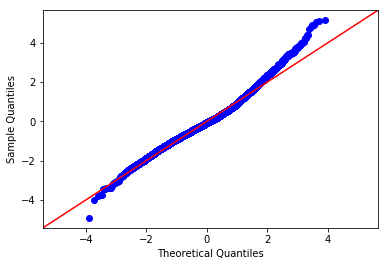

In [48]:
fig = sm.graphics.qqplot(resid, dist = stats.norm, line = '45', fit = True)

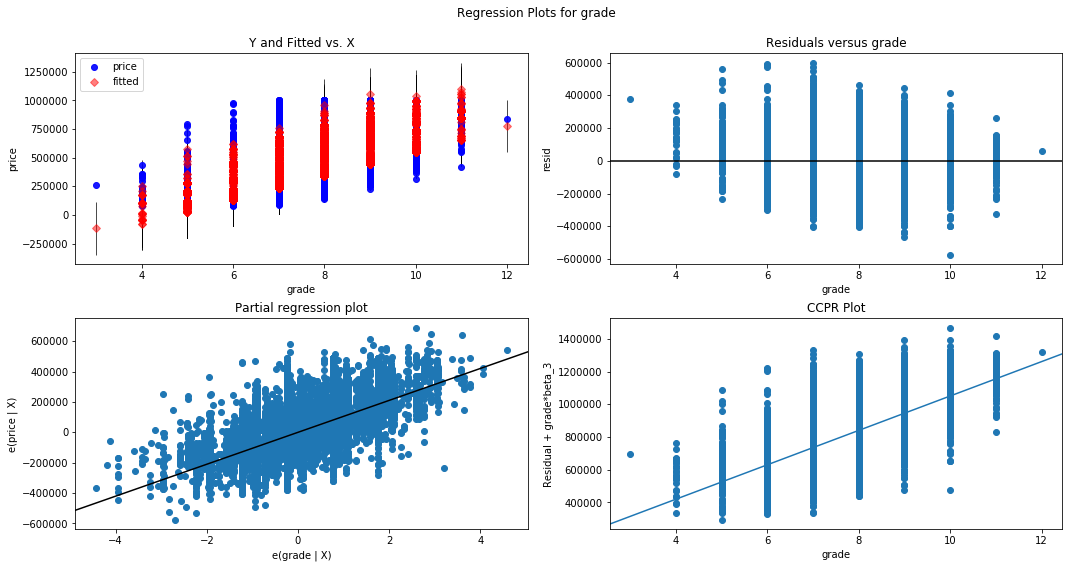

In [49]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "grade", fig=fig)
plt.show()

## Cross Validation

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))

In [51]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-13682349813.848349
-13703435314.191721
-13620025861.382256


## Model Summary